# Final Project
## Durga Venkata Phanindra Kumar Mulamreddy
## Naveen Donthula 


The primary goal of this project is to forecast the sentiment of the provided data. The data appears to be a movie review with both favorable and negative comments. We have four datasets. So, the project is divided into two phases: training and prediction of sentiment using production dataset.

# Importing All Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the data
X = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv')
y = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv")

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X['review'])
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

By using the TFID vectorizer we changed all the text data into numerical data to test on the models.

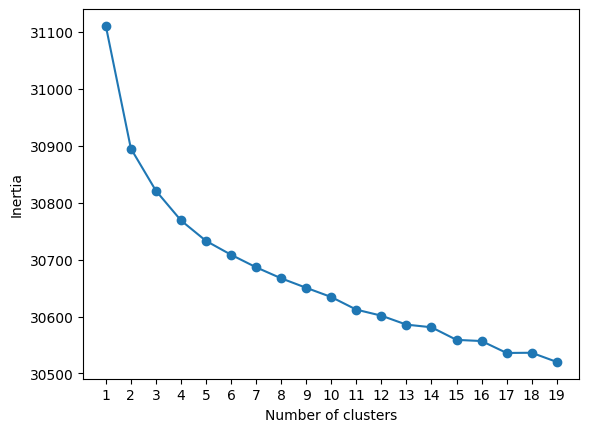

In [ ]:
# Determine the optimal number of clusters using elbow method
inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 20))
plt.show()

The elbow approach selects the number of clusters at the place on the plot where the drop in inertia slows dramatically, producing an elbow-like structure. This position reflects a fair compromise between the number of clusters and their compactness. It seeks to strike a balance between capturing the data's underlying structure and avoiding excessive complexity or noise.
So, here we have decided to take 18 clusters as optimal clusters for this model. 

In [ ]:
'''silhouette_scores = []
for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()'''

"silhouette_scores = []\nfor n_clusters in range(2, 20):\n    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)\n    labels = kmeans.labels_\n    score = silhouette_score(X, labels)\n    silhouette_scores.append(score)\n\n# Plot the silhouette scores for different number of clusters\nimport matplotlib.pyplot as plt\nplt.plot(range(2, 20), silhouette_scores)\nplt.xlabel('Number of clusters')\nplt.ylabel('Silhouette score')\nplt.show()"

# Clustering

Performing K-means clustering with 18 clusters on the dataset (X_train) helps organize and group similar instances together based on their features. This process aids in identifying patterns, similarities, and inherent structures within the data. The random_state=42 parameter ensures that the clustering results remain consistent and reproducible by setting a specific random seed value.

In [ ]:
kmeans = KMeans(n_clusters=18, random_state=42).fit(X_train)

In [ ]:
labels = kmeans.labels_
labels.shape
X_train.shape

(32000, 92213)

In [ ]:
print(X_train)

  (0, 19310)	0.11966913514383105
  (0, 82424)	0.11966913514383105
  (0, 76616)	0.11206164872808173
  (0, 87055)	0.44824659491232693
  (0, 13876)	0.10316146017216382
  (0, 50360)	0.10761155445012278
  (0, 81860)	0.09684667589658308
  (0, 68056)	0.09070473429434152
  (0, 77409)	0.10095904251458344
  (0, 68126)	0.0955539737564145
  (0, 50818)	0.3775904491515177
  (0, 38237)	0.20000813606874693
  (0, 48714)	0.09335155609883411
  (0, 24611)	0.08890146182087517
  (0, 68966)	0.19825115334304552
  (0, 15878)	0.15436321757425095
  (0, 15874)	0.08599638614992483
  (0, 24817)	0.06918110349661771
  (0, 19234)	0.08599638614992483
  (0, 55888)	0.07891163104702842
  (0, 80274)	0.08198015401160746
  (0, 85424)	0.07319861831861861
  (0, 62848)	0.14592516326332367
  (0, 83417)	0.07974559787447184
  (0, 47943)	0.08309724787859218
  :	:
  (31999, 62167)	0.13084238348045749
  (31999, 26202)	0.10808365587872706
  (31999, 48682)	0.09317773676568644
  (31999, 24181)	0.12189342868899888
  (31999, 79417)	0.0938

In [ ]:
top_words = {}
num_clusters  = 18
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = list(vectorizer.vocabulary_.keys())
for i in range(num_clusters):
  top_words[i] = [ terms[ind] for ind in order_centroids[i, :20]]

In [ ]:
#Assign Labels to Clusters
cluster_labels = {}
for i in range(num_clusters):
  cluster_labels[i] = f"cluster {i+1}"

#Print cluster labels and top words
for cluster, label in cluster_labels.items():
  print(f"{label}: {', '.join(top_words[cluster])}")

cluster 1: epitomizes, galvanizing, harakiri, pseudonym, overvoice, overdose, necrophiliacs, olliver, challenger, premutos, dabney, teams, huff, moldavia, goosebumps, allowing, spry, relief, virginny, turmoils
cluster 2: wolodarsky, pseudonym, semetary, raddick, extenuating, galvanizing, inebriated, olliver, moldavia, dose, challenger, virginny, necrophiliacs, hokkien, turmoils, siv, yips, boozed, homier, flutter
cluster 3: envahisseurs, homier, galvanizing, frothing, tripled, overdose, moldavia, icon, pink, pseudonym, polchak, embalming, 360s, rlc, olliver, challenger, convex, yrds, nazario, goosebumps
cluster 4: pseudonym, galvanizing, overdose, olliver, moldavia, challenger, icon, virginny, necrophiliacs, language, homier, tripled, pink, turmoils, embalming, bergorra, convex, recut, dcreasy2001, yrds
cluster 5: chaap, pseudonym, overdose, galvanizing, challenger, oedipial, jeannie, olliver, convex, moldavia, virginny, epitomé, dcreasy2001, nots, necrophiliacs, tripled, registered, r

The provided code summarizes the results of K-means clustering by identifying the most significant words associated with each cluster. It calculates and stores the top 20 words for each of the 18 clusters based on their feature importance. The code also assigns labels to the clusters and prints the cluster labels along with their respective top words. This analysis helps understand the distinguishing characteristics and themes represented by each cluster in the data.

In [ ]:
# Get the number of centroids in all the clusters
num_centroids = kmeans.cluster_centers_.shape[0]

print("Number of centroids:",num_centroids)

Number of centroids: 18


The chosen metric for evaluating nearest neighbors in the given code is the Euclidean distance. Euclidean distance is a widely used and straightforward metric for measuring the distance between points in multi-dimensional space.

In [ ]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a NearestNeighbors object and fit it to the centroids
nn = NearestNeighbors(n_neighbors=5)  # Find the nearest 4 neighbors (including the centroid itself)
nn.fit(X_train)

# Query the nearest neighbors for each centroid
distances, indices = nn.kneighbors(centroids)

# Store the indices of nearest neighbors for each centroid
nearest_neighbor_indices = indices[:, 1:]  # Exclude the first column, which corresponds to the centroid itself

# Print the nearest neighbor indices for each centroid
for i, centroid_index in enumerate(nearest_neighbor_indices):
    centroid = centroids[i]
    nearest_neighbor_indices = centroid_index
    #print("Centroid:", centroid)
    print("Nearest Neighbor Indices:", nearest_neighbor_indices)
    print()

Nearest Neighbor Indices: [17561 23070   198 18430]

Nearest Neighbor Indices: [ 9359 27998  8747 11211]

Nearest Neighbor Indices: [26198 14045 21858  3317]

Nearest Neighbor Indices: [27212 22407 15667 15371]

Nearest Neighbor Indices: [23195  2957   603 11193]

Nearest Neighbor Indices: [18510 11061  4492 30540]

Nearest Neighbor Indices: [27212 22407 15667 15371]

Nearest Neighbor Indices: [28810  3549  9165  1825]

Nearest Neighbor Indices: [16913  7190  9278 28564]

Nearest Neighbor Indices: [ 5234 26770 23803  5705]

Nearest Neighbor Indices: [27212 22407 15667 30540]

Nearest Neighbor Indices: [22839 14090   217  9874]

Nearest Neighbor Indices: [28810 18155 27920  9165]

Nearest Neighbor Indices: [19412 20553 28855 28244]

Nearest Neighbor Indices: [27212 22407  5818 15667]

Nearest Neighbor Indices: [ 9078  5832 12991 15025]

Nearest Neighbor Indices: [18143  1195 19792 16274]

Nearest Neighbor Indices: [18155  9370 28542 21858]



The results show the indices of the nearest neighbors for each centroid in a clustering scenario. For each centroid, the indices of the nearest neighbors are displayed. These indices represent the data points that are closest to each centroid based on the chosen distance metric. By examining these indices, one can identify the neighboring instances that share similarities or proximity to each centroid. This information provides insights into the local structure and relationships within the clusters.

In [ ]:
import numpy as np
indices

array([[  320, 17561, 23070,   198, 18430],
       [16367,  9359, 27998,  8747, 11211],
       [22304, 26198, 14045, 21858,  3317],
       [11061, 27212, 22407, 15667, 15371],
       [13074, 23195,  2957,   603, 11193],
       [27212, 18510, 11061,  4492, 30540],
       [11061, 27212, 22407, 15667, 15371],
       [18155, 28810,  3549,  9165,  1825],
       [11313, 16913,  7190,  9278, 28564],
       [19412,  5234, 26770, 23803,  5705],
       [11061, 27212, 22407, 15667, 30540],
       [ 2952, 22839, 14090,   217,  9874],
       [ 3549, 28810, 18155, 27920,  9165],
       [16706, 19412, 20553, 28855, 28244],
       [11061, 27212, 22407,  5818, 15667],
       [ 1992,  9078,  5832, 12991, 15025],
       [ 6593, 18143,  1195, 19792, 16274],
       [ 8981, 18155,  9370, 28542, 21858]])

Here we printed all indices into an array in which the first column is of centroid values and other columns are nearest neighbour values.

In [ ]:
idx = np.array(indices).flatten()
X_train_final = X_train[idx].toarray()

Here, we have retrieved the x_train data into a new data frame (X_train_final) with respect to the indices which are nearest to the centroid centers of each clusters(18).
Then, we have mapped the y_train data by using the indices which we got from nearest neighbour analysis of a cluster.

In [ ]:
final_y_train = y_train.iloc[idx]['sentiment']
final_y_train 

9618     0
26       0
11351    0
29172    0
21173    0
        ..
39021    0
26835    0
23822    0
31486    0
33504    0
Name: sentiment, Length: 90, dtype: int64

Sanity Check

In [ ]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The above cells extracts and analyzes the nearest neighbors in a clustering scenario. It selects a subset of the training data and labels based on the nearest neighbor indices. Additionally, it converts the test data from sparse to dense array format for further analysis or modeling. Overall, the code focuses on understanding the characteristics of the nearest neighbors and prepares the data for subsequent tasks.

We want to implement Logistic Regression model for the above preprocessed data. And we want to check how the model is performing and test the production data to see whether it is performing good or not.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_final,final_y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3948
           1       0.00      0.00      0.00      4052

    accuracy                           0.49      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.24      0.49      0.33      8000



The generated classification report provides evaluation metrics such as precision, recall, F1-score, and support for each class, as well as the overall accuracy of the model is 49%. The classification report allows for an assessment of the model's performance in predicting the class labels of the test data. Here we decided to try new model for better accuracy and prediction.

# Production Data Testing from logistic regression

In [ ]:
X_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv')
y_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_final.csv')
X_vect_final = vectorizer.transform(X_final['review'])

In [ ]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_vect_final)

# Generate the classification report
report = classification_report(y_final, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



Now we want to perform hyperparameter tuning, grid search to perform cross validation to know the best parameters and better understanding of the model.

In [ ]:
# Create the logistic regression model
logistic = LogisticRegression()

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)
grid_search.fit(X_train_final, final_y_train)

# Get the best estimator and its parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3948
           1       0.91      0.04      0.07      4052

    accuracy                           0.51      8000
   macro avg       0.70      0.52      0.37      8000
weighted avg       0.71      0.51      0.36      8000

Best Parameters: {'C': 10, 'penalty': 'l2'}


After performing the logistic regression and analysing the results we thought of implementing more models to check if there is any increase in accuracy of the model.
So, we used random forest classifier to get the better understanding.

In [ ]:
# Create the Random Forest model
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train_final, final_y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3948
           1       0.00      0.00      0.00      4052

    accuracy                           0.49      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.24      0.49      0.33      8000



In [ ]:
# Create the Random Forest model
random_forest = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train_final, final_y_train)

# Get the best estimator and its parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)


              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3948
           1       0.00      0.00      0.00      4052

    accuracy                           0.49      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.24      0.49      0.33      8000

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Here after performing the Hyperparameter tuning on random forest classifier there is no significant change in the accuracy of the model. The results conclude that this might not be the best fit for the given data.

By seeing the above models we didn't see any change in the accuracy. So, we decided to try with the decision tree classifier.

In [ ]:
# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train_final, final_y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.55      0.84      0.66      3948
           1       0.67      0.32      0.43      4052

    accuracy                           0.58      8000
   macro avg       0.61      0.58      0.55      8000
weighted avg       0.61      0.58      0.55      8000



In [ ]:
# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_final, final_y_train)

# Get the best estimator and its parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)


              precision    recall  f1-score   support

           0       0.55      0.85      0.66      3948
           1       0.68      0.32      0.43      4052

    accuracy                           0.58      8000
   macro avg       0.61      0.58      0.55      8000
weighted avg       0.61      0.58      0.55      8000

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


# Conclusion

Based on the provided accuracy results, the decision tree classifier showed the highest accuracy among the evaluated models. The other models have less accuracy and taking almost same time for execution.
Upon considering the runtime, accuracy and everything Decision Tree Classifier will be the best fit for the proposed Data Set.